# ML - Heart Disease Prediction Using Logistic Regression

##### **Heart Disease** is one of the main cause of death in world so detecting and predicting it early is important for better treatment and prevention. Machine learning become very helpful in healthcare for predicting conditions like heart disease. One method used is **logistic regression** which helps to predict the likelihood of something happening like whether a person has heart disease based on input features.

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# Load the framingham dataset
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
# check info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
# Check for null values in the dataset
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [7]:
# Check unique values in the dataset
df.nunique()

,0
male,2
age,39
education,4
currentSmoker,2
cigsPerDay,33
BPMeds,2
prevalentStroke,2
prevalentHyp,2
diabetes,2
totChol,248


In [8]:
# check describe of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [9]:
# drop NAN values from the dataset.
df.dropna(axis = 0, inplace=True)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [10]:
# Separate the data into feature and target variables
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [11]:
# Split the data into training and testing part.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print shape of training and testing part.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2926, 15) (732, 15) (2926,) (732,)


<ipython-input-12-248765045>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=df, palette='BuGn_r')


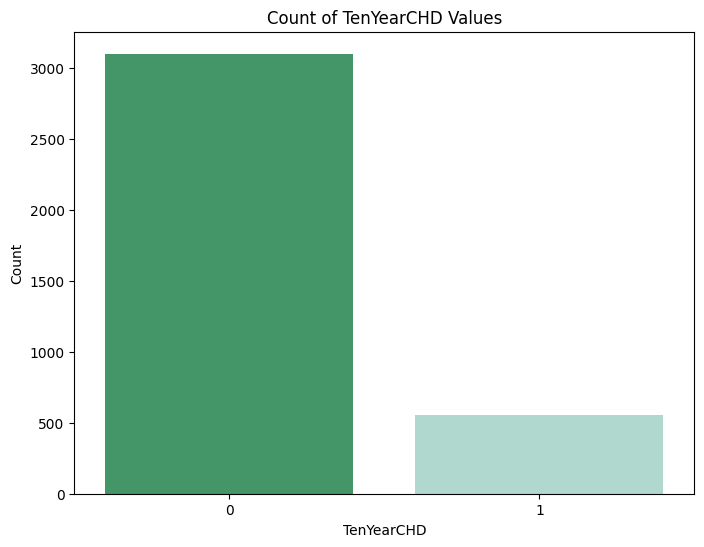

In [12]:
# Plot a countplot showing 'TenYearCHD' values.
plt.figure(figsize=(8, 6))
sns.countplot(x='TenYearCHD', data=df, palette='BuGn_r')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.title('Count of TenYearCHD Values')
plt.show()


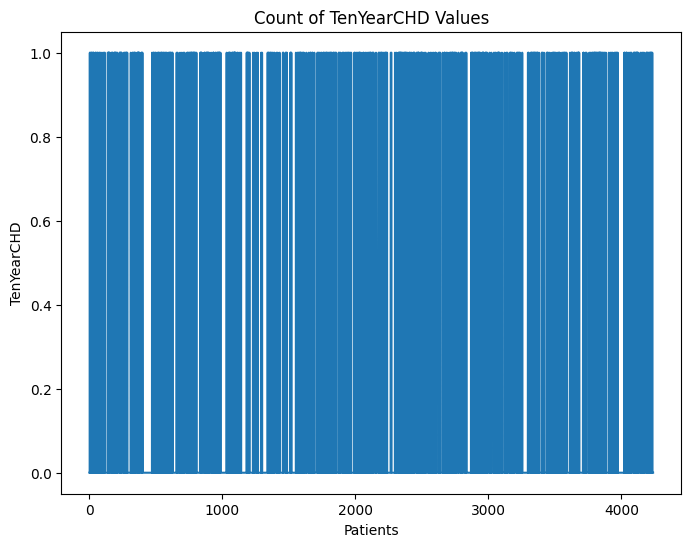

In [13]:
# Count and plot number of patients affected by CHD.
plt.figure(figsize=(8, 6))
last = df['TenYearCHD'].plot()
plt.xlabel('Patients')
plt.ylabel('TenYearCHD')
plt.title('Count of TenYearCHD Values')
plt.show(last)


In [14]:
# Build and Fit logistic regression model on the dataset.
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# Make prediction on new data.
y_pred = model.predict(X_test)

In [16]:
# Evalute the logistics regression model.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.8346994535519126
[[609   1]
 [120   2]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       610
           1       0.67      0.02      0.03       122

    accuracy                           0.83       732
   macro avg       0.75      0.51      0.47       732
weighted avg       0.81      0.83      0.76       732



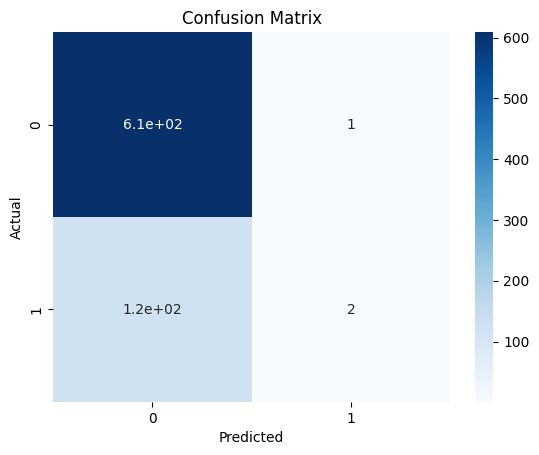

In [17]:
# Display confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Import necessary libraries for SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

In [19]:
# Check the class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

Class distribution before SMOTE: Counter({0: 2491, 1: 435})


In [20]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [21]:
# Check the class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y_train_smote))


Class distribution after SMOTE: Counter({0: 2491, 1: 2491})


In [22]:
# Build and Fit logistic regression model on the SMOTE-resampled dataset.
model_improved = LogisticRegression(solver='liblinear', random_state=42) # Using liblinear solver often works well with smaller datasets and L1/L2 regularization
model_improved.fit(X_train_smote, y_train_smote)


LogisticRegression(random_state=42, solver='liblinear')

In [23]:
# Make prediction on new data.
y_pred_improved = model_improved.predict(X_test)


In [24]:
# Evaluate the improved logistics regression model.
print("Improved Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_improved))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_improved))
print("Classification Report:\n", classification_report(y_test, y_pred_improved))


Improved Model Evaluation:
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[411 199]
 [ 45  77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77       610
           1       0.28      0.63      0.39       122

    accuracy                           0.67       732
   macro avg       0.59      0.65      0.58       732
weighted avg       0.80      0.67      0.71       732



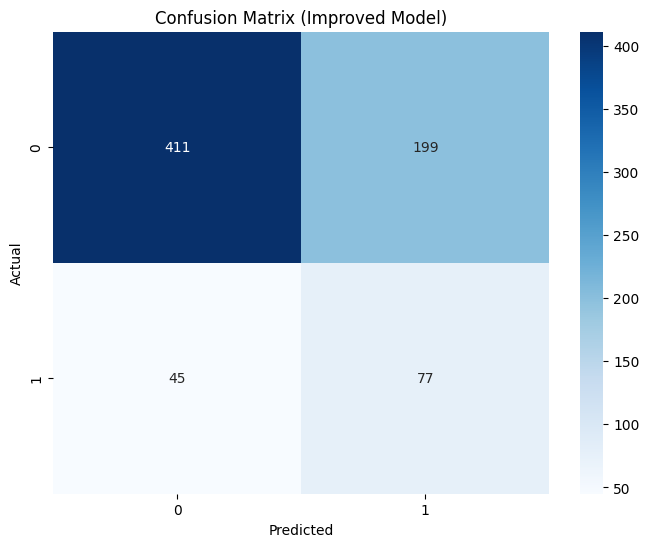

In [25]:
# Display confusion Matrix for the improved model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_improved), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Improved Model)')
plt.show()

In [28]:
## Checking Prediction on New Data
# Let's create a sample new data point for prediction.
# Replace these values with realistic data for a patient.
new_data = pd.DataFrame({
    'male': [1],
    'age': [50],
    'education': [2],
    'currentSmoker': [0],
    'cigsPerDay': [0],
    'BPMeds': [0],
    'prevalentStroke': [0],
    'prevalentHyp': [1],
    'diabetes': [0],
    'totChol': [220],
    'sysBP': [140],
    'diaBP': [90],
    'BMI': [25],
    'heartRate': [75],
    'glucose': [80]
})


In [29]:
# Make prediction on the new data
prediction_new = model_improved.predict(new_data)

print("\nPrediction for the new data point:", prediction_new[0])
if prediction_new[0] == 1:
    print("The model predicts that this individual is likely to have heart disease within 10 years.")
else:
    print("The model predicts that this individual is unlikely to have heart disease within 10 years.")



Prediction for the new data point: 0
The model predicts that this individual is unlikely to have heart disease within 10 years.


In [32]:
# ## Identifying and Plotting Important Features

# Get the coefficients of the logistic regression model
coefficients = model_improved.coef_[0]

# Create a pandas Series to store feature names and their corresponding absolute coefficients
feature_importance = pd.Series(abs(coefficients), index=X_train_smote.columns)

In [33]:
# Sort the features by importance (absolute coefficient value) in descending order
sorted_feature_importance = feature_importance.sort_values(ascending=False)


In [34]:
# Select the top N features (you can adjust N)
top_n_features = sorted_feature_importance.head(10) # Let's plot top 10 features


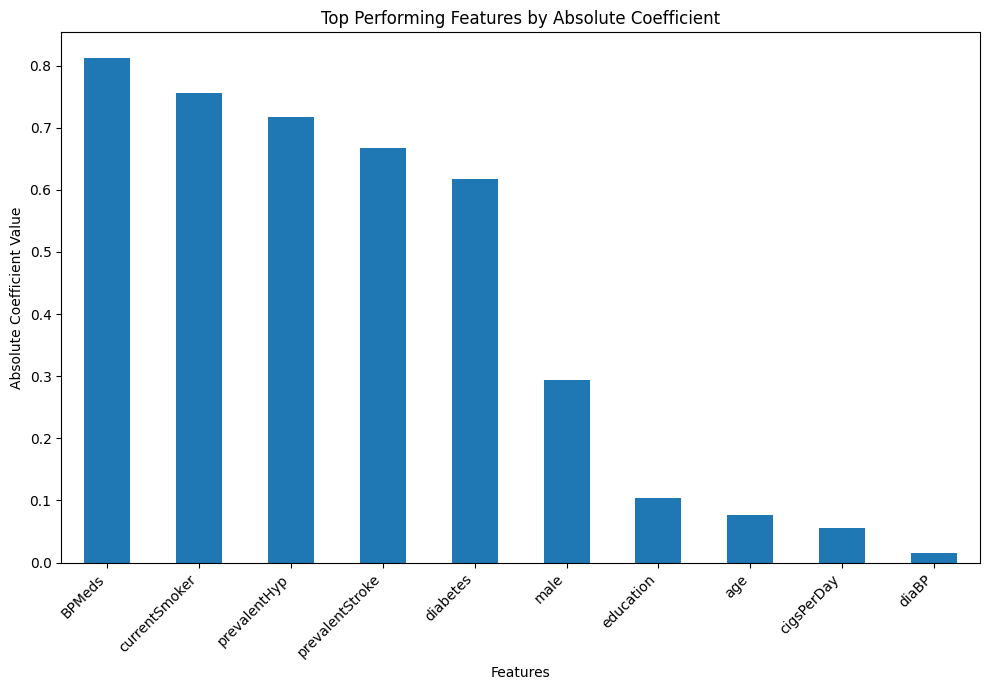

In [35]:
# Plot the top performing features
plt.figure(figsize=(10, 7))
top_n_features.plot(kind='bar')
plt.title('Top Performing Features by Absolute Coefficient')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **CONCLUSION:**

The improved logistic regression model, trained on SMOTE-resampled data, demonstrates a significant improvement in identifying individuals at risk of heart disease compared to the initial model. While the overall accuracy is lower, the increased recall for the heart disease class is crucial for proactive healthcare interventions.